In [41]:
#!/usr/bin/env python
# coding: utf-8


import os.path
import warnings

warnings.filterwarnings("ignore")
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from seaborn import regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import keras
import xgboost as xgb
from pmdarima import auto_arima
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

from google.colab import drive

In [3]:
#!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00


In [27]:
# Country ticker mapping
country_ticker_map = {
    'India': 'INR=X',
    'Euro Zone': 'EUR=X',
    'Japan': 'JPY=X',
    'United Kingdom': 'GBP=X',
}


In [28]:
def get_input_country():
    # Predefined mapping of country names to Yahoo Finance currency exchange ticker symbols

    try:
        # Prompt the user for the country name
        print("Please enter the country name from the following list to download its currency exchange data:")
        for country in country_ticker_map.keys():
            print(' - ', country)

        country_name = input("Country Name - ")
        ticker_symbol = country_ticker_map.get(country_name)

    except Exception as e:
        print("Currency exchange data for the Specified country doesn't exists. Please update the Country list.")
        print("Error - ", e)

    return country_name

In [29]:
def prepare_data(file_name):
    data = pd.read_csv(file_name)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

    x = data[['Open', 'High', 'Low']]
    y = data['Close']

    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

    return xtrain, xtest, ytrain, ytest, data

In [58]:
def data_exploration(file_name):
    # Load data
    data = pd.read_csv(file_name)

    # Summary Statistics
    print("Summary Statistics:")
    print(data.describe())

    # Visualizations

    # Get the Correlations using heat map
    # Select only numeric columns for correlation calculation
    corr_df = data.select_dtypes(include=['float64', 'int64'])
    fig = px.imshow(corr_df.corr(), x=corr_df.columns, y=corr_df.columns,
                    labels=dict(x="Features", y="Features", color="Correlation"))
    fig.update_layout(title_text="Heat Map of Currency Distribution")
    fig.show()

    # Close Price Distribution with KDE
    fig = px.histogram(data, x='Close', histnorm='probability density', nbins=30)
    fig.add_trace(kde_scatter(np.linspace(data['Close'].min(), data['Close'].max(), 100), data['Close'], color='red'))
    fig.update_traces(marker=dict(color='skyblue', line=dict(color='black', width=1)))
    fig.update_layout(title="Close Price Distribution Trend with KDE", xaxis_title="Close Price", yaxis_title="Density")
    fig.show()

    # Boxplot for the selected columns
    fig = px.box(data.melt(value_vars=['Open', 'High', 'Low', 'Close']), x='variable', y='value',
                 title="Boxplot of Open, High, Low, and Close Prices",
                 labels=dict(variable="Features", value="Value"),
                 color='variable',
                 color_discrete_map={'Open': 'blue', 'High': 'green', 'Low': 'orange', 'Close': 'red'})
    fig.update_xaxes(tickangle=45)
    fig.show()


    # Scatterplot matrix
    fig = px.scatter_matrix(data.drop(columns=['Date']), title="Scatterplot of Numerical Features")
    fig.show()

    # Line plot
    fig = px.line(data, x='Date', y='Close', title="Time Series Plot of Close Price")
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="Close Price")
    fig.show()

In [50]:
def kde_scatter(x, y, **kwargs):
    kde = sm.nonparametric.KDEUnivariate(y)
    kde.fit()
    kde_values = kde.evaluate(x)
    return go.Scatter(x=x, y=kde_values, mode='lines', line=dict(color=kwargs.get('color')), name='KDE')


In [63]:
def data_exploration(file_name):
    # Load data
    data = pd.read_csv(file_name)

    # Summary Statistics
    print("Summary Statistics:")
    print(data.describe())

    # Visualizations

    # Line plot
    fig = px.line(data, x='Date', y='Close', title="Time Series Plot of Close Price")
    fig.update_xaxes(title_text="Date")
    fig.update_yaxes(title_text="Close Price")
    fig.show()

    # Get the Correlations using heat map
    # Select only numeric columns for correlation calculation
    corr_df = data.select_dtypes(include=['float64', 'int64'])
    fig = px.imshow(corr_df.corr(), x=corr_df.columns, y=corr_df.columns,
                    labels=dict(x="Features", y="Features", color="Correlation"))
    fig.update_layout(title_text="Heat Map of Currency Distribution")
    fig.show()


    # Close Price Distribution with KDE
    fig = px.histogram(data, x='Close', histnorm='probability density', nbins=30)
    fig.add_trace(kde_scatter(np.linspace(data['Close'].min(), data['Close'].max(), 100), data['Close'], color='red'))
    fig.update_traces(marker=dict(color='skyblue', line=dict(color='black', width=1)))
    fig.update_layout(title="Close Price Distribution Trend with KDE", xaxis_title="Close Price", yaxis_title="Density")
    fig.show()


    # Boxplot for the selected columns
    fig = px.box(data.melt(value_vars=['Open', 'High', 'Low', 'Close']), x='variable', y='value',
                 title="Boxplot of Open, High, Low, and Close Prices",
                 labels=dict(variable="Features", value="Value"),
                 color='variable',
                 color_discrete_map={'Open': 'blue', 'High': 'green', 'Low': 'orange', 'Close': 'red'})
    fig.update_xaxes(tickangle=45)
    fig.show()

    # Scatterplot matrix
    fig = px.scatter_matrix(data.drop(columns=['Date']), title="Scatterplot of Numerical Features")

    # Adjust marker size and opacity
    fig.update_traces(marker=dict(size=3, opacity=0.7))

    # Adjust layout
    fig.update_layout(
        height=800,
        width=800,
        title_font=dict(size=24),
        font=dict(size=10),
        title_x=0.5,
        title_y=0.9,
        title_text="Scatterplot of Numerical Features",
        plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
        paper_bgcolor='rgba(0,0,0,0)',  # Transparent paper
    )
    fig.show()


    # Time Series Decomposition
    decomposition = sm.tsa.seasonal_decompose(data['Close'], model='additive', period=30) # Change period as needed
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=decomposition.trend, mode='lines', name='Trend'))
    fig.add_trace(go.Scatter(x=data['Date'], y=decomposition.seasonal, mode='lines', name='Seasonal'))
    fig.add_trace(go.Scatter(x=data['Date'], y=decomposition.resid, mode='lines', name='Residual'))
    fig.update_layout(title="Time Series Decomposition of Close Price", xaxis_title="Date", yaxis_title="Close Price")
    fig.show()

    # Autocorrelation Plot
    fig = sm.graphics.tsa.plot_acf(data['Close'], lags=40) # Change lags as needed
    fig.show()

    # Lagged Scatterplot
    lagged_data = data.copy()
    lagged_data['Close Lagged'] = lagged_data['Close'].shift(1) # Lag by 1 time step
    fig = px.scatter(lagged_data, x='Close Lagged', y='Close', title="Lagged Scatterplot of Close Price")
    fig.show()


In [31]:
def get_currenct_data(country_name,BASE_PATH):
    # Lookup the ticker symbol
    ticker_symbol = country_ticker_map.get(country_name)
    print("\nticker_symbol ", ticker_symbol)

    project_folder = BASE_PATH + 'Currency_Exchange_Model/'

    file_name = project_folder + ticker_symbol.replace('=X', '') + "_historical_data.csv"
    print("File Name - ", file_name)

    try:
        if os.path.exists(file_name):
            currency_data_df = pd.read_csv(file_name, parse_dates=['Date'])
            latest_date = currency_data_df['Date'].max().date()
            print("Latest Date in File : ", latest_date)
        else:
            open(file_name, 'a').close()
            latest_date = datetime.date(2019, 12, 31)
    except Exception as e:
        print("Error in getting the latest date - ", str(e))

    if ticker_symbol:
        # Define the time frame for the last 1 month
        end_date = datetime.date.today()
        start_date = latest_date + datetime.timedelta(days=1)
        if start_date == end_date:
            print("Currency exchange is upto date, applying the machine learning model................")
            return file_name

        # Get data
        print("Fetching the data from {} to {} : ".format(start_date, end_date))
        ticker_data = yf.Ticker(ticker_symbol)
        ticker_df = ticker_data.history(period='1d', start=start_date, end=end_date)
        ticker_df.reset_index(inplace=True)

        # Display the data
        print(ticker_df)
        print(ticker_df.columns)

        # Save to CSV
        if os.path.getsize(file_name) == 0:
            ticker_df.to_csv(file_name, mode='w', header=True, index=False)
            print("File created with exchange rates for the country {} from {} to {}".format(country_name, start_date,
                                                                                             end_date))
            print("File Name - {}".format(file_name))

        else:
            ticker_df.to_csv(file_name, mode='a', header=False, index=False)
        print("Data updated with the current date for the country {}".format(country_name))
        print("File Name - {}".format(file_name))
    else:
        print("Currency exchange data for the Specified country doesn't exists. Please update the Country list.")
    return file_name

In [32]:
def arima_model(data):
    exchange_rate = data['Close']

    # Split the data into training and testing sets
    train_size = int(len(exchange_rate) * 0.8)
    train_data = exchange_rate[:train_size]
    test_data = exchange_rate[train_size:]

    # Fit the ARIMA model
    model = ARIMA(train_data, order=(0, 1, 1))
    results = model.fit()

    # Make predictions on the test set
    predictions = results.forecast(steps=len(test_data))

    # Calculate the RMSE for the entire test set
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    print("ARIMA - RMSE: {:.4f}".format(rmse))

    # Get the next 5 predictions
    next_5_predictions = results.forecast(steps=5)
    # print("ARIMA - Next 5 Predictions:", next_5_predictions)
    data = results.forecast(steps=30)
    return data, rmse


def auto_arima_model(data):
    exchange_rate = data['Close']

    # Split the data into training and testing sets
    train_size = int(len(exchange_rate) * 0.8)
    train_data = exchange_rate[:train_size]
    test_data = exchange_rate[train_size:]

    # Fit the auto ARIMA model
    model = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)

    # Make predictions on the test set
    predictions = model.predict(n_periods=len(test_data))

    # Calculate the RMSE for the entire test set
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    print("Auto ARIMA - RMSE: {:.4f}".format(rmse))

    # Get the next 5 predictions
    # next_5_predictions = model.predict(n_periods=5)
    # print("Auto ARIMA - Next 5 Predictions:", next_5_predictions)
    data = model.predict(n_periods=30)
    return data, rmse


def sarima_model(data):
    exchange_rate = data['Close']
    train_size = int(len(exchange_rate) * 0.8)
    train_data = exchange_rate[:train_size]
    test_data = exchange_rate[train_size:]

    model = SARIMAX(train_data, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()

    # Make predictions on the test set
    predictions = results.forecast(steps=len(test_data))

    # Calculate the RMSE for the entire test set
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    print("SARIMA - RMSE: {:.4f}".format(rmse))

    # Get the next 5 predictions
    # next_5_predictions = results.forecast(steps=5)
    # print("SARIMA - Next 5 Predictions:", next_5_predictions)
    data = results.forecast(steps=30)
    return data, rmse


def xgboost_model(xtrain, xtest, ytrain, ytest):
    # Create the XGBoost model
    model = xgb.XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)

    # Train the model
    model.fit(xtrain, ytrain)

    # Make predictions on the test set
    predictions = model.predict(xtest)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(ytest, predictions))
    print("XGBoost - RMSE: {:.4f}".format(rmse))

    # Get the next 5 predictions
    # next_5_days = xtest[-5:]
    # next_5_predictions = model.predict(next_5_days)
    # print("XGBoost - Next 5 Predictions:", next_5_predictions)
    next_30_days = xtest[-30:]
    data = model.predict(next_30_days)
    return data, rmse


def cnn_model(xtrain, xtest, ytrain, ytest):
    # Reshape the input data for CNN
    xtrain_cnn = xtrain.values.reshape((xtrain.shape[0], xtrain.shape[1], 1))
    xtest_cnn = xtest.values.reshape((xtest.shape[0], xtest.shape[1], 1))

    # Create the CNN model
    model = keras.Sequential([
        keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(xtrain_cnn.shape[1], 1)),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Flatten(),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(xtrain_cnn, ytrain, epochs=50, batch_size=32, verbose=1)

    # Make predictions on the test set
    predictions = model.predict(xtest_cnn).flatten()

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(ytest, predictions))
    print("CNN - RMSE: {:.4f}".format(rmse))

    # Get the next 5 predictions
    next_5_days = xtest_cnn[-5:]
    next_5_predictions = model.predict(next_5_days).flatten()
    # print("CNN - Next 5 Predictions:", next_5_predictions)

    next_30_days = xtest_cnn[-30:]
    data = model.predict(next_30_days).flatten()
    return data, rmse


Please enter the country name from the following list to download its currency exchange data:
 -  India
 -  Euro Zone
 -  Japan
 -  United Kingdom
Country Name - India
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

ticker_symbol  INR=X
File Name -  /content/drive/My Drive/Currency_Exchange_Model/INR_historical_data.csv
Latest Date in File :  2024-04-15
Currency exchange is upto date, applying the machine learning model................
Summary Statistics:
              Open         High          Low        Close  Volume  Dividends  \
count  1119.000000  1119.000000  1119.000000  1119.000000  1119.0     1119.0   
mean     77.716903    77.937482    77.499400    77.711204     0.0        0.0   
std       4.045998     4.020424     4.085459     4.052434     0.0        0.0   
min      70.718903    70.952499    70.606499    70.718002     0.0        0.0   
25%      74.223751    74.456249    74.038700    74.249451 

XGBoost - RMSE: 0.0943
Epoch 1/50
28/28 [==============================] - 1s 3ms/step - loss: 4477.5923
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 887.8889
Epoch 3/50
28/28 [==============================] - 0s 4ms/step - loss: 13.6689
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 1.3253
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0503
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 8/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 9/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 10/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0441
Epoch 11/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 12/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0440
Epoch 13/50
28/28 [=

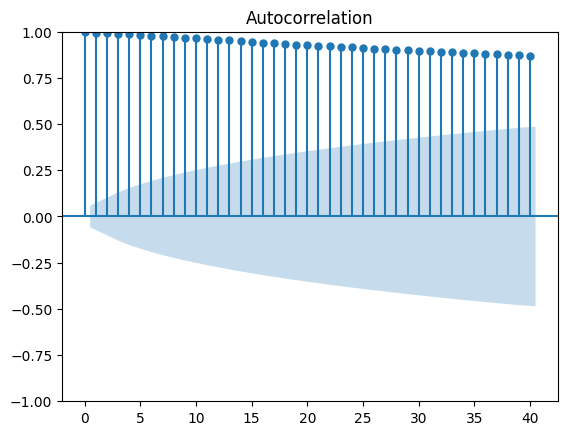

In [64]:
# Main program starts here

# Get the inpur country from user
try:
    input_country = get_input_country()
except Exception as e:
    print("Error - ", e)

# Mount Google Drive
try:
  drive.mount('/content/drive')
except Exception as e:
  print("Error in Mounting the drive : ", str(e) )

# Define base path in Google Drive
BASE_PATH = '/content/drive/My Drive/'

# Get the currency exchange data for the given country
file_name = get_currenct_data(input_country,BASE_PATH)

# Plot the data to show trends
data_exploration(file_name)

# Prepare Testing and Training data
xtrain, xtest, ytrain, ytest, data = prepare_data(file_name)

# feed the data into machine learning model
#reg_data, reg_rmse = regression_analysis(file_name)
xg_data, xg_rmse = xgboost_model(xtrain, xtest, ytrain, ytest)
cnn_data, cnn_rmse = cnn_model(xtrain, xtest, ytrain, ytest)
arima_data, arima_rmse = arima_model(data)
sarima_data, sarima_rmse = sarima_model(data)
auto_arima_data, auto_arima_rmse = auto_arima_model(data)

print("---------------------------------------------------------------------------------------------")
print("Comparing the RMSE values of all the models :\n")

# Collecting RMSE values in a dictionary
rmse_values = {
    'XGBoost': xg_rmse,
    'CNN': cnn_rmse,
    'ARIMA': arima_rmse,
    'SARIMA': sarima_rmse,
    'Auto ARIMA': auto_arima_rmse
}

# Dictionary of DataFrames associated with each model
data_frames = {
    'XGBoost': xg_data,
    'CNN': cnn_data,
    'ARIMA': arima_data,
    'SARIMA': sarima_data,
    'Auto ARIMA': auto_arima_data
}

# Display all RMSE values
for model, rmse in rmse_values.items():
    print(f"{model} RMSE: {rmse}")

# Find the model with the least RMSE value
best_model = min(rmse_values, key=rmse_values.get)
print(f"\nModel with the lowest RMSE: {best_model} ({rmse_values[best_model]})")

# Print the DataFrame of the best model
print(f"DataFrame of the best model ({best_model} with RMSE {rmse_values[best_model]}):")
print(data_frames[best_model])

# Generate dates for the next 30 days starting from tomorrow
start_date = datetime.datetime.now() + datetime.timedelta(days=1)
dates = [(start_date + datetime.timedelta(days=i)).strftime('%Y-%m-%d') for i in range(30)]

# Create DataFrame
df = pd.DataFrame({'date': dates, 'forecast_currency_exchange': data_frames[best_model]})

forecast_file_name = BASE_PATH + 'currency_forecast/' + input_country + '_currency_forecast.csv'
# Save DataFrame to CSV
df.to_csv(forecast_file_name, index=False)

print("CSV file 'currency_forecast.csv' has been created with date and forecast currency exchange values.")
